<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Decision Trees and Random Forest</H1></u></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
iris = load_iris()
dt = tree.DecisionTreeClassifier()
dt = dt.fit(iris.data, iris.target)

In [3]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image  

In [4]:
import os
import sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)

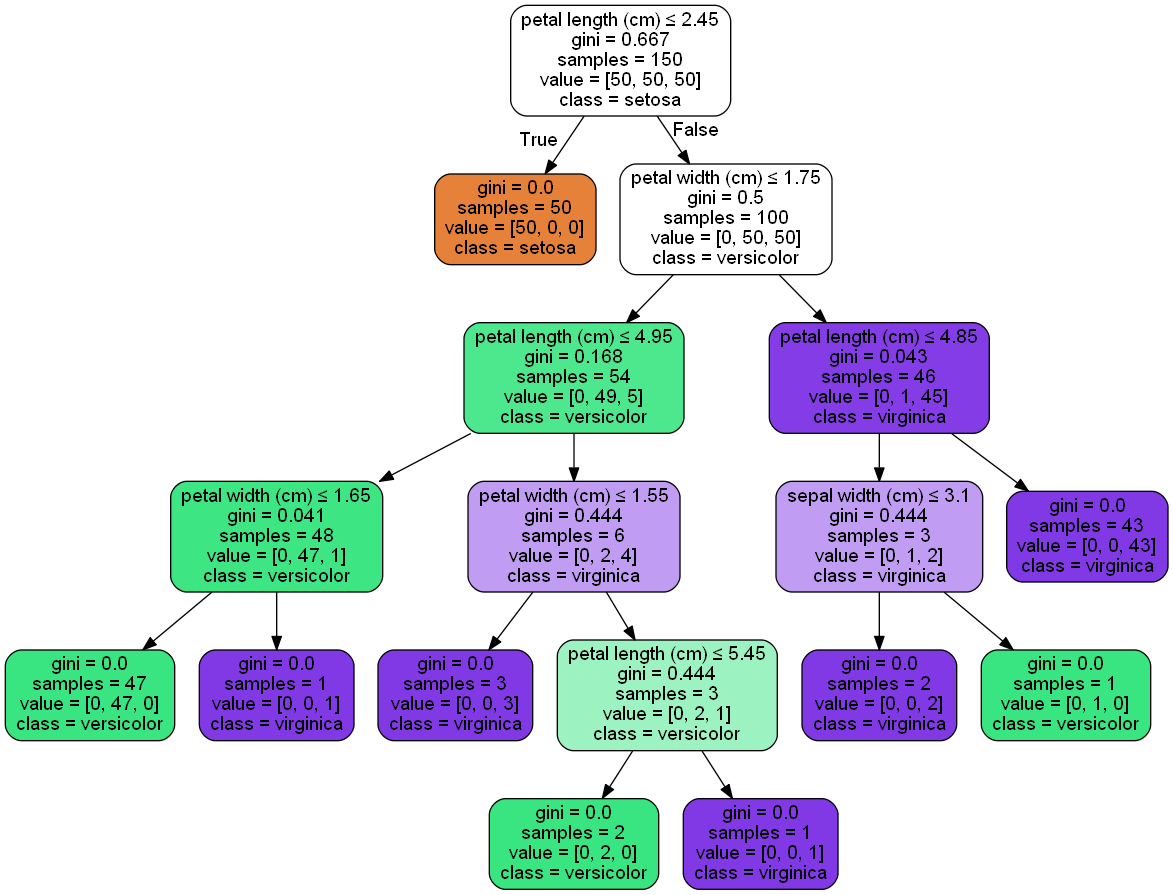

In [5]:
buffer = StringIO()
tree.export_graphviz(dt, out_file=buffer, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(buffer.getvalue())
conda_fix(graph)
graph.write_pdf("iris_tree.pdf") 
Image(graph.create_png())

### References:
http://www.graphviz.org/Download_windows.php

pydotplus install:
conda install -c conda-forge pydotplus=2.0.2

## Predictions:

In [6]:
iris.data[:1, :]

array([[5.1, 3.5, 1.4, 0.2]])

In [7]:
dt.predict(iris.data[:1, :])

array([0])

In [8]:
dt.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

## Cross Validation:

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt, iris.data, iris.target, cv=5)

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

## Plotting Decision Boundaries:

In [10]:
def plot_regions(X, y, classifier):
    # Parameters
    n_classes = 3
    plot_colors = "bry"
    res = 0.02

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
        
        X = iris.data[:, pair]
        # Train
        clf = classifier.fit(X, y)

        # Plot the decision boundary
        fig = plt.figure(1,figsize=(15, 12))
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, res),
                         np.arange(y_min, y_max, res))
        
        output = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
        output = output.reshape(xx.shape)
        plt.pcolormesh(xx,yy, output, cmap=plt.cm.coolwarm_r)
        
        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])
        
        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
          
    plt.suptitle("Decision surface of a decision tree")
    plt.legend(loc='best')
    plt.show()

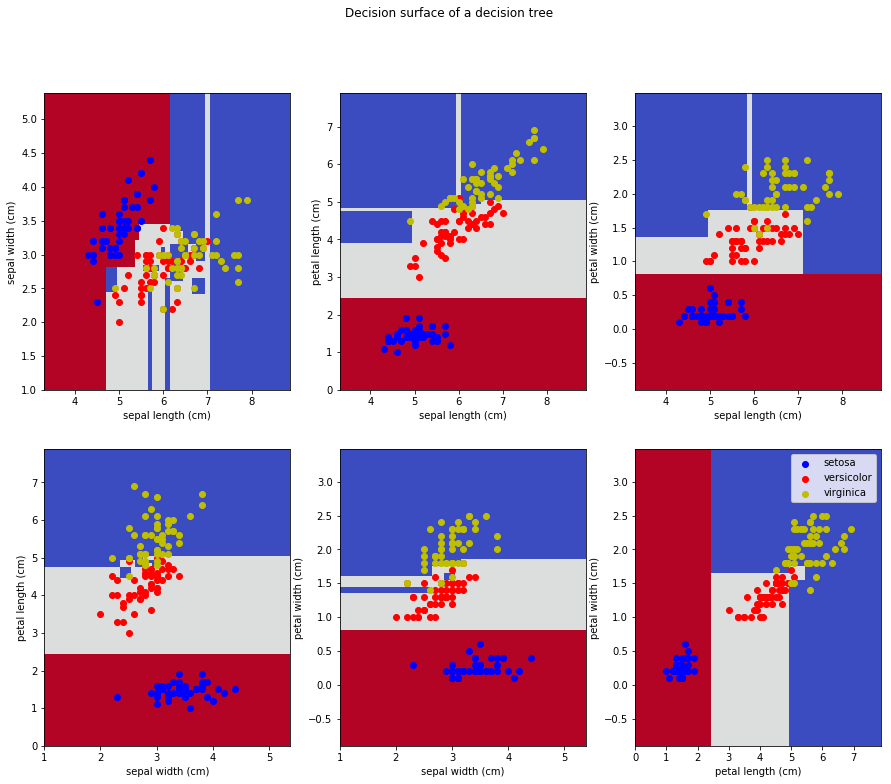

In [11]:
# We only take the two corresponding features
X = iris.data
y = iris.target
new_dt = tree.DecisionTreeClassifier()
plot_regions(X=X,y=y,classifier=new_dt)

# Random Forest:

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [15]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
# Making predictions on the test set
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))

[[15  0  0]
 [ 0 10  0]
 [ 0  2 18]]


In [18]:
print(classification_report(y_test,rf_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.83      1.00      0.91        10
          2       1.00      0.90      0.95        20

avg / total       0.96      0.96      0.96        45



In [19]:
cross_val_score(dt, X_test, y_test, cv=5)

array([1.        , 1.        , 0.88888889, 0.88888889, 0.88888889])

## Reference: 

http://scikit-learn.org/stable/modules/tree.html

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html